# Open Market Backtesting Monthly

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
import wrds
import sys
sys.path.append('..')

# Import Main Python Modules
from src.dataframe_construction import *
from src.a_estimation import *
from src.optimal_strategies import *
from src.backtest import *


#### Code

In [2]:
d = 2000
start_date='1965-01-01'
datapath='../data/'
filename='CRSP_monthly_cleaned.h5'
caps_table='mthprevcap'
returns_table='mthret'

df = MonthlyData(d=d, start_date=start_date, datapath=datapath, filename=filename, caps_table=caps_table, returns_table=returns_table)

In [7]:
df.returns_by_permno.head(2)

permno,10001.0,10002.0,10003.0,10006.0,10008.0,10009.0,10010.0,10011.0,10012.0,10014.0,...,93423.0,93426.0,93428.0,93429.0,93430.0,93432.0,93433.0,93434.0,93435.0,93436.0
mthcaldt,,,,,,,,,,,,,,,,,,,,,
1965-01-29,NaN,NaN,NaN,-0.026120,NaN,NaN,NaN,NaN,NaN,0.047619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965-02-26,NaN,NaN,NaN,0.040248,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.caps_by_permno.head(2)

permno,10001.0,10002.0,10003.0,10006.0,10008.0,10009.0,10010.0,10011.0,10012.0,10014.0,...,93423.0,93426.0,93428.0,93429.0,93430.0,93432.0,93433.0,93434.0,93435.0,93436.0
mthcaldt,,,,,,,,,,,,,,,,,,,,,
1965-01-29,NaN,NaN,NaN,248570.0,NaN,NaN,NaN,NaN,NaN,8843.625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965-02-26,NaN,NaN,NaN,239666.0,NaN,NaN,NaN,NaN,NaN,9264.750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


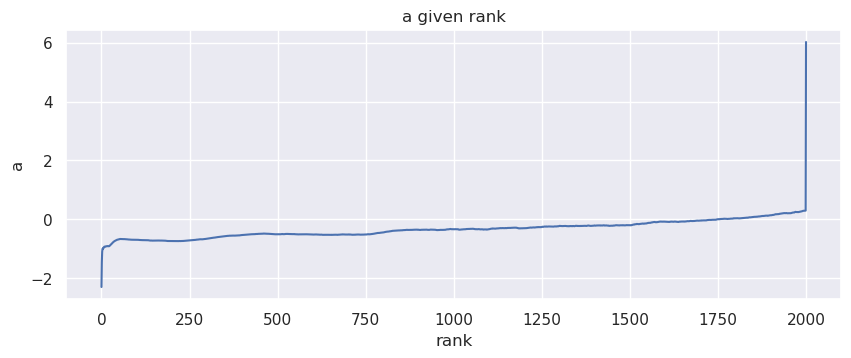

In [10]:
method = 'direct_log'
smooth_method = 'exponential_moving_average'
smooth_parameter = 0.01
a = estimate_a(df.weights_by_rank, smooth_method=smooth_method, smooth_parameter=smooth_parameter)
plot_a(a)

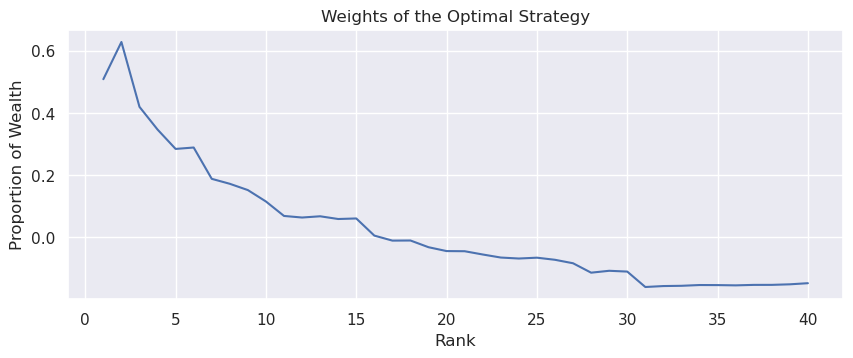

In [5]:
setting = 'pure'
N = 40
date = '2008-03-31'

strategy = compute_weights_optimal_open(setting=setting, N=N, a=a, weights_by_rank=df.weights_by_rank)
plot_strategy(strategy, date)

The average return each month was 1.0016


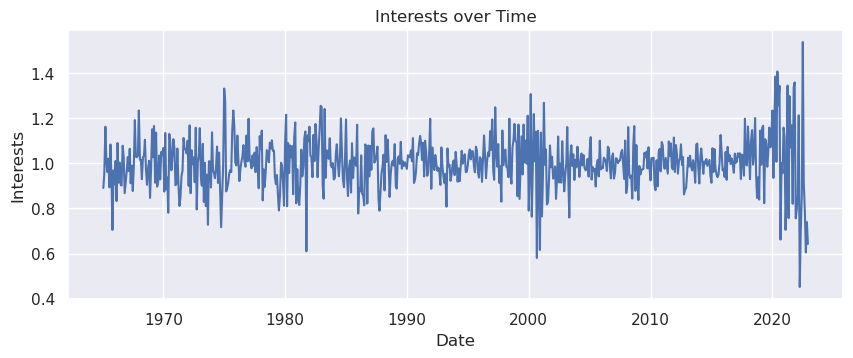

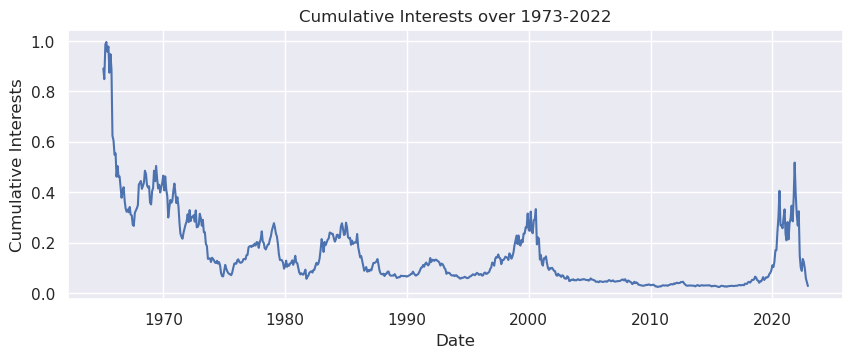

In [6]:
backtest = Backtest(strategy=strategy, weights_permno_by_rank=df.weights_permno_by_rank, returns_by_permno=df.returns_by_permno)
    
backtest.run()
print('The average return each month was',round(np.mean(backtest.interests), 4))
backtest.plot_interests()
backtest.plot_cumulative_interests()